In [653]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [654]:
fl = 'data/consolidated/iv_by_post.csv'
iv = pd.read_csv(fl, delimiter="|", dtype={'Quantity': int})

In [655]:
 d = {
     'January':1, 'February':2, 'March':3, 
     'April':4, 'May':5, 'June': 6,
     'July': 7, 'August': 8, 'September': 9,
     'October': 10, 'November': 11, 'December': 12
  }

e = {
    'First Preference (Priority Workers)':'EB-1',
    'Employment 2nd Preference (Professionals Holding Advanced Degrees or Persons of Exceptional Ability)': 'EB-2',
    'Employment 3rd Preference (Skilled Workers, Professionals, and Other Workers)': 'EB-3',
    'Employment 4th Preference (Certain Special Immigrants)': 'EB-4',
    'Employment 5th Preference (Employment Creation Conditional Status)': 'EB-5'
}

#iv.Month = iv.Month.map(d)
iv['Period'] = iv.Year.astype(str) + ' - ' +  iv.Month.astype(str)
iv['Moniker'] = iv.SubCategory.map(e)

In [656]:
iv

,Post,VisaClass,Quantity,VisaType,Year,Month,Category,SubCategory,Description,Period,Moniker
0,abidjan,cr1,8,IV,2018,July,Immediate Relatives,General,Spouse of U.S. citizen (conditional status) 20...,2018 - July,NaN
1,abidjan,dv1,36,IV,2018,July,Other Numerically Limited Categories,Diversity Immigrants,Diversity Immigrant 203(c),2018 - July,NaN
2,abidjan,dv2,9,IV,2018,July,Other Numerically Limited Categories,Diversity Immigrants,Spouse of DV1 203(d) & 203(c),2018 - July,NaN
3,abidjan,dv3,11,IV,2018,July,Other Numerically Limited Categories,Diversity Immigrants,Child of DV1 203(d) & 203(c),2018 - July,NaN
4,abidjan,e21,1,IV,2018,July,Employment-Based Preferences,Employment 2nd Preference (Professionals Holdi...,Professional holding advanced degree or alien ...,2018 - July,EB-2
...,...,...,...,...,...,...,...,...,...,...,...
79816,yerevan,se3,2,IV,2019,October,Employment-Based Preferences,Employment 4th Preference (Certain Special Imm...,Child of SE1 101(a)(27)(D) & 203(b)(4),2019 - October,EB-4
79817,zagreb,cr1,1,IV,2019,October,Immediate Relatives,General,Spouse of U.S. citizen (conditional status) 20...,2019 - October,NaN
79818,zagreb,e31,1,IV,2019,October,Employment-Based Preferences,"Employment 3rd Preference (Skilled Workers, Pr...",Skilled worker 203(b)(3)(A)(i).,2019 - October,EB-3
79819,zagreb,ir1,2,IV,2019,October,Immediate Relatives,General,Spouse of U.S. citizen 201(b),2019 - October,NaN


In [657]:
gr = iv.loc[
        iv.Category == 'Employment-Based Preferences', 
        ['Period', 'Moniker', 'Quantity']
        ].groupby(['Moniker', 'Period']).sum().sort_values(['Period'])

gr = gr.reset_index()

gr

,Moniker,Period,Quantity
0,EB-1,2017 - April,139
1,EB-5,2017 - April,901
2,EB-2,2017 - April,178
3,EB-4,2017 - April,154
4,EB-3,2017 - April,495
...,...,...,...
164,EB-1,2019 - October,166
165,EB-2,2019 - September,158
166,EB-1,2019 - September,38
167,EB-3,2019 - September,9


In [658]:
df = gr.pivot_table('Quantity', 'Period', 'Moniker')

df = df.reset_index()

In [659]:

df

Moniker,Period,EB-1,EB-2,EB-3,EB-4,EB-5
0,2017 - April,139.0,178.0,495.0,154.0,901.0
1,2017 - August,224.0,48.0,703.0,158.0,897.0
2,2017 - December,530.0,240.0,1117.0,84.0,1285.0
3,2017 - July,212.0,268.0,599.0,218.0,631.0
4,2017 - June,168.0,307.0,574.0,137.0,691.0
5,2017 - March,195.0,242.0,660.0,190.0,969.0
6,2017 - May,258.0,260.0,602.0,152.0,685.0
7,2017 - November,449.0,264.0,557.0,138.0,969.0
8,2017 - October,687.0,360.0,706.0,196.0,860.0
9,2017 - September,136.0,142.0,584.0,60.0,331.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


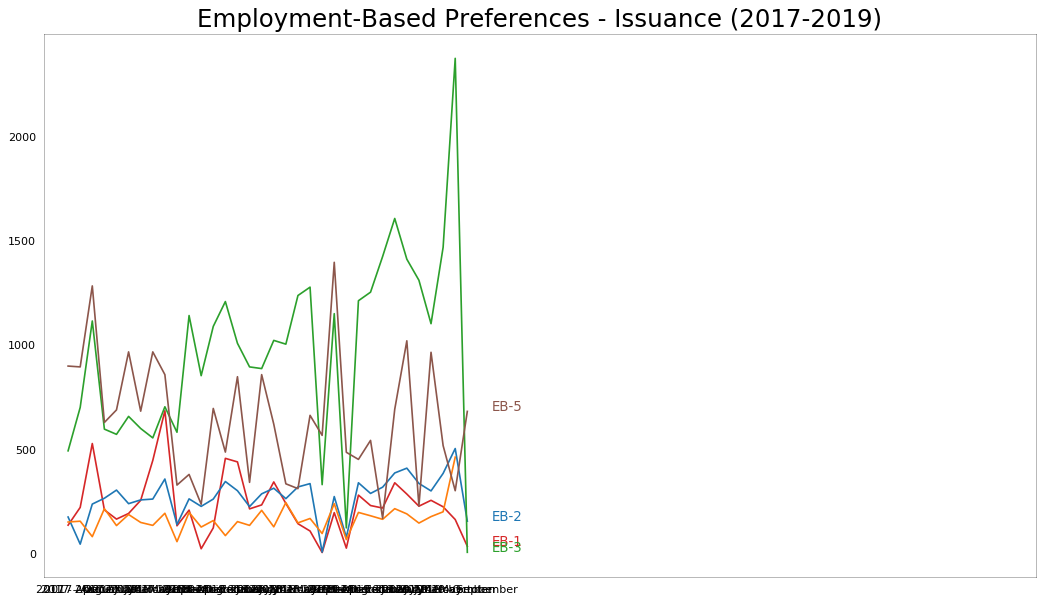

In [662]:
y_LL = 0
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 500

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)  

columns = df.columns[1:]  

for i, column in enumerate(columns):    
    plt.plot(df.Period.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=12, color=mycolors[i])

# Draw Tick lines  
#for y in range(y_LL, y_UL, y_interval):    
#    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Employment-Based Preferences - Issuance (2017-2019)', fontsize=22)
#plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
#plt.xticks(range(0, df.shape[0], 12), df.Period.values[::12], horizontalalignment='center', fontsize=8)    
#plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)  

plt.show()
